In [18]:
from tsai.data.external import get_forecasting_time_series
from tsai.data.validation import TimeSplitter
from tsai.data.preparation import SlidingWindow
from tsai.data.core import TSForecasting
from tsai.data.preprocessing import TSStandardize
from tsai.tslearner import TSForecaster
from tsai.inference import load_learner

import matplotlib.pyplot as plt

In [11]:
# load the Weather dataset
ts = get_forecasting_time_series("Weather")

Dataset: Weather
downloading data...
...done. Path = data/forecasting/Weather.csv.zip


In [12]:
# X.shape -> (n_samples, features, seq_len)
ts = get_forecasting_time_series("Weather").values
target_col = [1]
features = [i for i in range(ts.shape[1]) if i not in target_col]
target = [i for i in range(ts.shape[1]) if i in target_col]

window_len = 60
fh = 3
X, y= SlidingWindow(window_len=window_len, horizon=fh, get_x=features, get_y=target)(ts)

Dataset: Weather
downloading data...
...done. Path = data/forecasting/Weather.csv.zip


In [13]:
# models -> For multi-target forecasting, tsai supports Plus models.
arch = "FCNPlus"

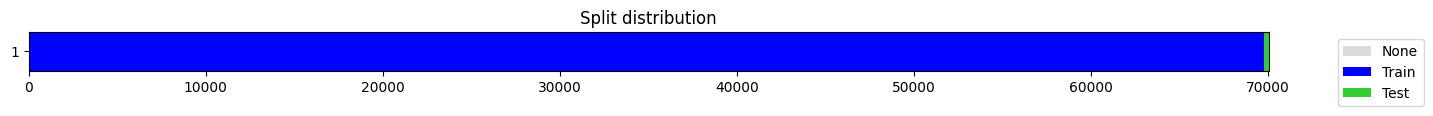

epoch     train_loss  valid_loss  mae       time    
0         141.410858  28.865875   4.676663  00:01                                             


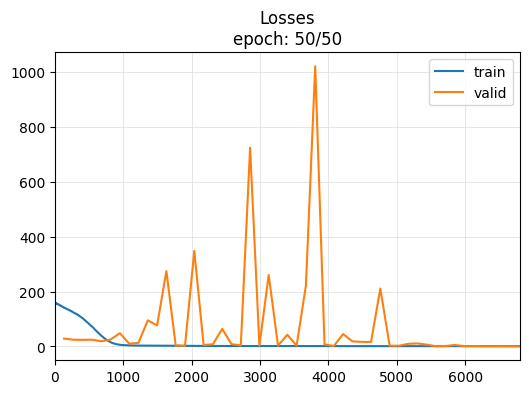

1         123.851402  24.597155   4.301908  00:01                                             
2         102.315483  24.091156   4.258810  00:01                                             
3         72.475380   24.748276   4.329894  00:01                                            
4         39.571301   18.925114   3.696151  00:01                                            
5         15.600884   25.505861   4.519506  00:01                                            
6         6.138245    48.379509   6.228590  00:01                                           
7         4.047076    10.241985   2.711890  00:01                                           
8         3.163164    13.240456   3.303905  00:01                                           
9         2.786170    95.292442   9.613292  00:01                                            
10        2.627204    76.626945   8.561706  00:01                                            
11        2.470226    274.678986  16.450016 00:01            

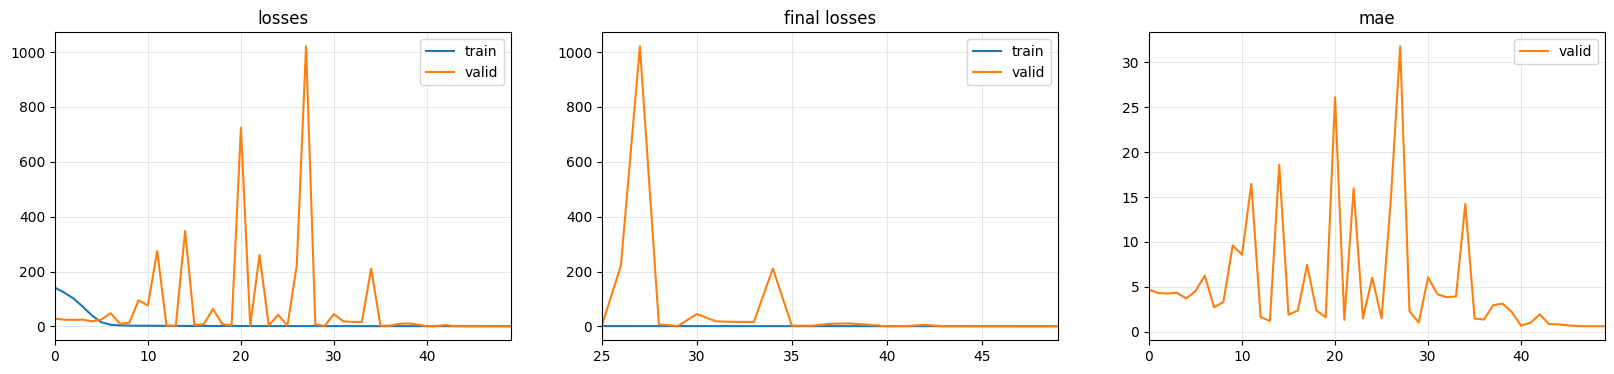

In [14]:
splits = TimeSplitter(235, fcst_horizon=3)(y) 
tfms = [None, TSForecasting()]
batch_tfms = TSStandardize()
fcst = TSForecaster(X, y, splits=splits, path='models', tfms=tfms, batch_tfms=batch_tfms, bs=512, arch=arch, metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)
fcst.export("fcst.pkl")

In [15]:
fcst = load_learner("models/fcst.pkl", cpu=False)
raw_preds, target, preds = fcst.get_X_preds(X[splits[1]], y[splits[1]])
raw_preds.shape
# torch.Size([235, 3])

torch.Size([235, 3])

In [16]:
# plot original and predicted time series
targets = target.flatten()
predss = []
for p in preds:
    predss.extend(p)

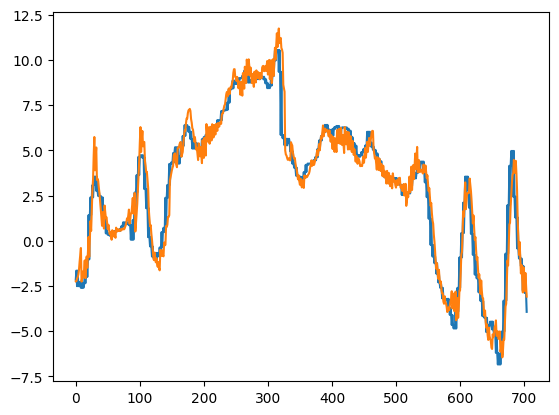

In [17]:
# flatten the preds
plt.plot(targets)
plt.plot(predss)